# Análise Exploratória de Dados

### Definição

Acontece que temos um dataset para trabalhar, o do Titanic. Sabemos pouco ou quase nada dos dados, sua distribição, o que podem significar, como variam e etc. Faz-se portanto necessário realizarmos uma **Análise Exploratória de Dados (da sigla em inglês EDA)** no nosso dataset, afim de fazer uma limpeza em dados incongruentes, dados faltantes, padronizar dados que possam estar fora de um padrão, tratar variáveis numéricas e categóricas e outras coisas mais que estão inseridas no contexto da **EDA**.

> Essa etapa é de **EXTREMA importância** para a nossa próxima etapa, a de escolha de um algoritmo de ML e do treinamento do mesmo. Visto que nosso aprendizado deve ser claro, didático e preciso, o aprendizado de um algoritmo matemático (IA) também deve ser e portanto devemos analisar e tratar o conjunto de dados que será utilizado para "ensinar" o algoritmo a reconhecer algum padrão.

Algumas atividades que realizaremos e comumente será realizado sempre que mexermos em um dataset novo:

*   Verificar e descrever os dados
*   Verificar a existência de dados nulos/faltantes e realizar sua limpeza
*   Realizar uma análise estatística dos dados
*   Visualização dos dados
*   Analisar correlações entre as variáveis
*   Tirar conclusões com base nessa Análise Exploratória
*   Tratar e converter dados afim de que o algoritmo entenda melhor os mesmos



Material de apoio
- [Artigo da IBM sobre EDA](https://www.ibm.com/topics/exploratory-data-analysis)

- [Artigo do Medium com ótimos insights sobre EDAs](https://)

- [Notebook no Kaggle com um tutorial bem didático sobre EDAs](https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis)

### Implementação

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")

#### Rápida descrição dos dados

O dicionário dos dados, descrevendo o que cada coluna significa/representa, está no link do dataset: [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

In [ ]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
print(f"(Numero de linhas, Numero de colunas) - {df.shape}")

(Numero de linhas, Numero de colunas) - (891, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Verificação de nulos/faltantes e o tratamento desses casos

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

A coluna Cabin tem MUITOS nulos, a coluna Age tem apenas alguns e a coluna Embarked tem um valor insignificante de nulos

##### **Tratamento da coluna Age**

Por ter uma razão de aproximadamente 1 dado nulo a cada 8 não nulos não faz mal substituir os dados nulos pela média da coluna

In [ ]:
print(f"media da coluna Age: {df['Age'].mean()}")
df = df.fillna({"Age":df["Age"].mean()})

media da coluna Age: 29.69911764705882


##### **Tratamento da coluna Cabin**

Por ter uma razão de aproximadamente 6 dados nulos para 8 não nulos e não ter uma grande importância para o nosso dataset iremos remover essa coluna

In [ ]:
# code here


##### **Tratamento da coluna Embarked**

Como só tem 2 valores não-nulos vamos substituir ambos pela moda (valor que mais aparece) da coluna

In [ ]:
print(f"media da coluna Embarked: {df['Embarked'].mode()}")
df = df.fillna({"Embarked":df["Embarked"].mode()[0]})

media da coluna Embarked: 0    S
Name: Embarked, dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Análise Estatística dos dados

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Considerações a respeito das variáveis numéricas:

*   **Idade:** A média das idades do dataset é na faixa dos 29/30 anos, tendo uma pessoa de 0.4 anos (???) e a pessoa mais velha tendo 80 anos.
*   **Nº de irmãos ou conjuges a bordo:** Existe uma pessoa que está viajando com mais 8 pessoas, entre irmãos e conjuges.
*   **Nº de parentes ou crianças:** Existe uma pessoa que está viajando com mais 8 parentes, podendo se ter, dentre esses 8, alguma criança.
*   **Tarifa:** A média no valor da tarifa girava em torno de 32,20 (Libras?), segundo a linha 'mínimo' pode ser que alguma pessoa viajou de graça, o que pode ser impossível, e a pessoa que pagou mais caro pagou algo em torno de 512,32(Libras?)


In [ ]:
# variaveis categoricas
# code here


#### Visualização de dados

Utilizaremos agora algumas libs do python que são ótimas para esta tarefa de visualizar os dados plotando gráficos. As libs em questão são o **Seaborn e o Matplotlib**.

Abaixo deixarei o link das documentações afim de que consultem como usar melhor, os tipos de gráficos disponíveis e suas implementações:

*    [Seaborn documentation](https://seaborn.pydata.org/)
*    [Matplotlib.pyplot documentation](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)


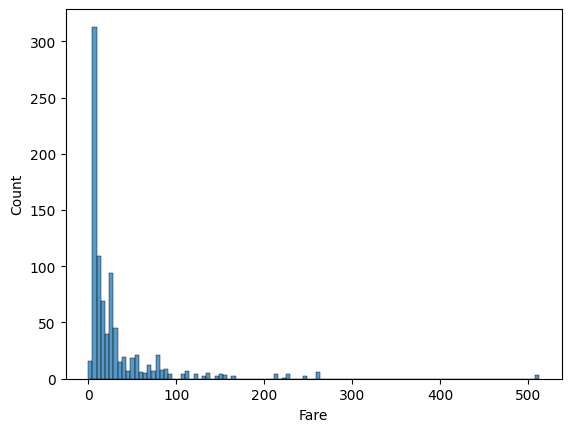

In [ ]:
sns.histplot(df, x='Fare');

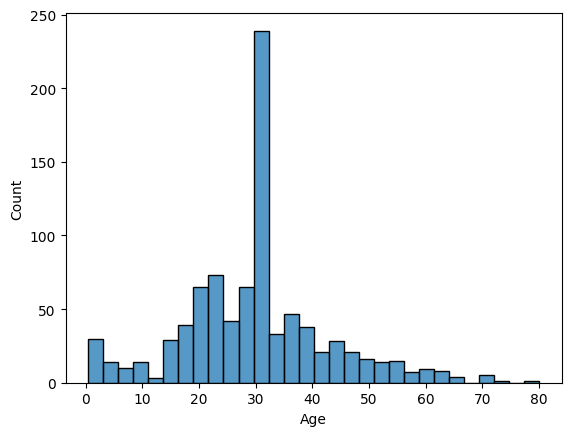

In [ ]:
sns.histplot(df, x='Age');

[Text(0, 0.5, '')]

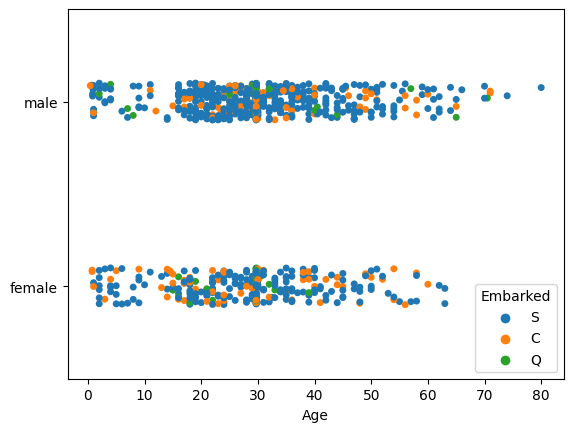

In [ ]:
ax = sns.stripplot(data=df, x="Age", y="Sex", hue="Embarked")
ax.set(ylabel="")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(16.722222222222214, 0.5, '')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


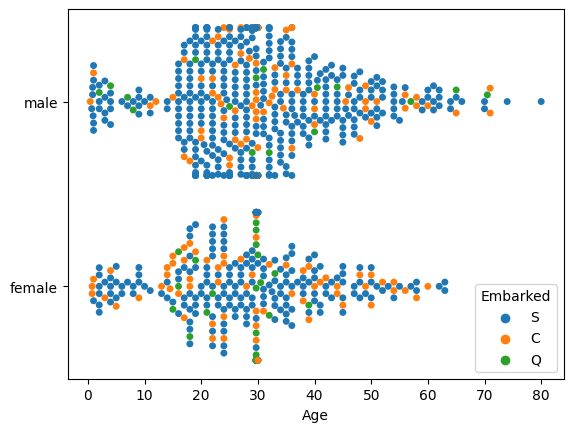

In [ ]:
ax = sns.swarmplot(data=df, x="Age", y="Sex", hue="Embarked")
ax.set(ylabel="")

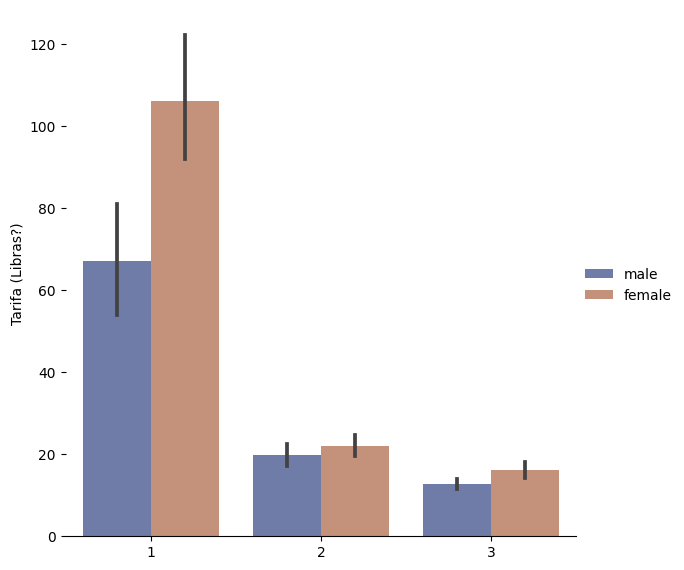

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="Pclass", y="Fare", hue="Sex", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Tarifa (Libras?)")
g.legend.set_title("")

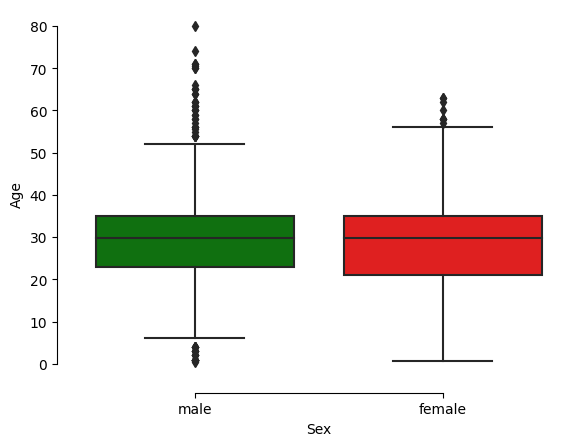

In [ ]:
sns.boxplot(x="Sex", y="Age",
            palette=["g", "r"],
            data=df)
sns.despine(offset=10, trim=True)

#### Analisando correlações

<ipython-input-68-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


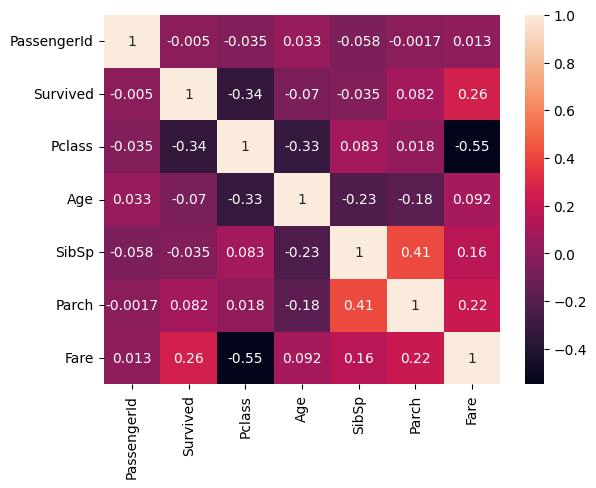

In [ ]:
sns.heatmap(df.corr(), annot=True);

A coluna de Irmãos/Conjuges tem uma correlação moderada/fraca com a coluna Parentes/Crianças.

#### Conclusões

#### Tratamento ou conversão de dados para treinamento do modelo

O modelo escolhido nem sempre vai entender o tipo de informação que uma coluna passa. Para um modelo matemático de ML pode não fazer sentido quando ele ver "Male" ou "Female" em uma coluna de Sexo do indivíduo por exemplo. Para contornarmos essa problemática e melhorar a aprendizagem de um modelo de ML podemos aplicar algumas codificações em nossas colunas, afim de reconfigurarmos os dados de modo que fiquem em um formato no qual o modelo possa aprender melhor.

Pesquisem sobre LabelEncoder e OneHotEncoder, técnicas utilizadas em ML e Ciência de dados para a nossa problemática de tratamento e conversão de dados.


[Artigo do Medium sobre LabelEncoder e OneHotEncoder](https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)


In [ ]:
# code here
